In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sys

import warnings
warnings.filterwarnings ("ignore")

In [2]:
Data=pd.read_csv(r"H:\Machine_Lerning_AM\Data\30 Data\train.csv")

In [3]:
Data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [5]:
test_data=pd.read_csv(r"H:\Machine_Lerning_AM\Data\دیتاست جلسه سی ام\test.csv")


                                                       Preprocessing

In [6]:
df=pd.DataFrame(Data)
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [8]:
# comparing between data test and strain
test_data.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [9]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [10]:
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
df.dtypes


battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [13]:
print ("Duplicate values in df are:" , df.duplicated ().sum ())

Duplicate values in df are: 0


                                                          Visualization and Noise

In [14]:
df.rename(columns={'battery_power': 'batterypower', 'dual_sim': "dualsim",
                   "clock_speed": "clockspeed",
                   "four_g": "fourg",
                'int_memory': "intmemory", 'm_dep': "mdep", 
                   "mobile_wt":"mobilewt",
                   "n_cores":"ncores", 
                   "px_height":"pxheight",
                   "px_width":"pxwidth",
                   "sc_h":"such",
                   "sc_w":"scw",
                   "talk_time":"talktime",
                   "three_g":"three",
                   "touch_screen": "touchscreen",
                   "price_range":"pricerange"
                
                  }, inplace=True)
df.columns

Index(['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       'pricerange'],
      dtype='object')

In [15]:
corr_matrix = df.corr()
corr_matrix 


batterypower      blue  clockspeed   dualsim        fc  \
batterypower      1.000000  0.011252    0.011482 -0.041847  0.033334   
blue              0.011252  1.000000    0.021419  0.035198  0.003593   
clockspeed        0.011482  0.021419    1.000000 -0.001315 -0.000434   
dualsim          -0.041847  0.035198   -0.001315  1.000000 -0.029123   
fc                0.033334  0.003593   -0.000434 -0.029123  1.000000   
fourg             0.015665  0.013443   -0.043073  0.003187 -0.016560   
intmemory        -0.004004  0.041177    0.006545 -0.015679 -0.029133   
mdep              0.034085  0.004049   -0.014364 -0.022142 -0.001791   
mobilewt          0.001844 -0.008605    0.012350 -0.008979  0.023618   
ncores           -0.029727  0.036161   -0.005724 -0.024658 -0.013356   
pc                0.031441 -0.009952   -0.005245 -0.017143  0.644595   
pxheight          0.014901 -0.006872   -0.014523 -0.020875 -0.009990   
pxwidth          -0.008402 -0.041533   -0.009476  0.014291 -0.005176   
ram              -0.000653  0.026351    0.003443  0.041072  0.015099   
such             -0.029959 -0.002952   -0.029078 -0.011949 -0.011014   
scw              -0.021421  0.000613   -0.007378 -0.016666 -0.012373   
talktime          0.052510  0.013934   -0.011432 -0.039404 -0.006829   
three             0.011522 -0.030236   -0.046433 -0.014008  0.001793   
touchscreen      -0.010516  0.010061    0.019756 -0.017117 -0.014828   
wifi             -0.008343 -0.021863   -0.024471  0.022740  0.020085   
pricerange        0.200723  0.020573   -0.006606  0.017444  0.021998   

                 fourg  intmemory      mdep  mobilewt    ncores  ...  \
batterypower  0.015665  -0.004004  0.034085  0.001844 -0.029727  ...   
blue          0.013443   0.041177  0.004049 -0.008605  0.036161  ...   
clockspeed   -0.043073   0.006545 -0.014364  0.012350 -0.005724  ...   
dualsim       0.003187  -0.015679 -0.022142 -0.008979 -0.024658  ...   
fc           -0.016560  -0.029133 -0.001791  0.023618 -0.013356  ...   
fourg         1.000000   0.008690 -0.001823 -0.016537 -0.029706  ...   
intmemory     0.008690   1.000000  0.006886 -0.034214 -0.028310  ...   
mdep         -0.001823   0.006886  1.000000  0.021756 -0.003504  ...   
mobilewt     -0.016537  -0.034214  0.021756  1.000000 -0.018989  ...   
ncores       -0.029706  -0.028310 -0.003504 -0.018989  1.000000  ...   
pc           -0.005598  -0.033273  0.026282  0.018844 -0.001193  ...   
pxheight     -0.019236   0.010441  0.025263  0.000939 -0.006872  ...   
pxwidth       0.007448  -0.008335  0.023566  0.000090  0.024480  ...   
ram           0.007313   0.032813 -0.009434 -0.002581  0.004868  ...   
such          0.027166   0.037771 -0.025348 -0.033855 -0.000315  ...   
scw           0.037005   0.011731 -0.018388 -0.020761  0.025826  ...   
talktime     -0.046628  -0.002790  0.017003  0.006209  0.013148  ...   
three         0.584246  -0.009366 -0.012065  0.001551 -0.014733  ...   
touchscreen   0.016758  -0.026999 -0.002638 -0.014368  0.023774  ...   
wifi         -0.017620   0.006993 -0.028353 -0.000409 -0.009964  ...   
pricerange    0.014772   0.044435  0.000853 -0.030302  0.004399  ...   

              pxheight   pxwidth       ram      such       scw  talktime  \
batterypower  0.014901 -0.008402 -0.000653 -0.029959 -0.021421  0.052510   
blue         -0.006872 -0.041533  0.026351 -0.002952  0.000613  0.013934   
clockspeed   -0.014523 -0.009476  0.003443 -0.029078 -0.007378 -0.011432   
dualsim      -0.020875  0.014291  0.041072 -0.011949 -0.016666 -0.039404   
fc           -0.009990 -0.005176  0.015099 -0.011014 -0.012373 -0.006829   
fourg        -0.019236  0.007448  0.007313  0.027166  0.037005 -0.046628   
intmemory     0.010441 -0.008335  0.032813  0.037771  0.011731 -0.002790   
mdep          0.025263  0.023566 -0.009434 -0.025348 -0.018388  0.017003   
mobilewt      0.000939  0.000090 -0.002581 -0.033855 -0.020761  0.006209   
ncores       -0.006872  0.024480  0.004868 -0.000315  0.025826  0.013148   
pc      

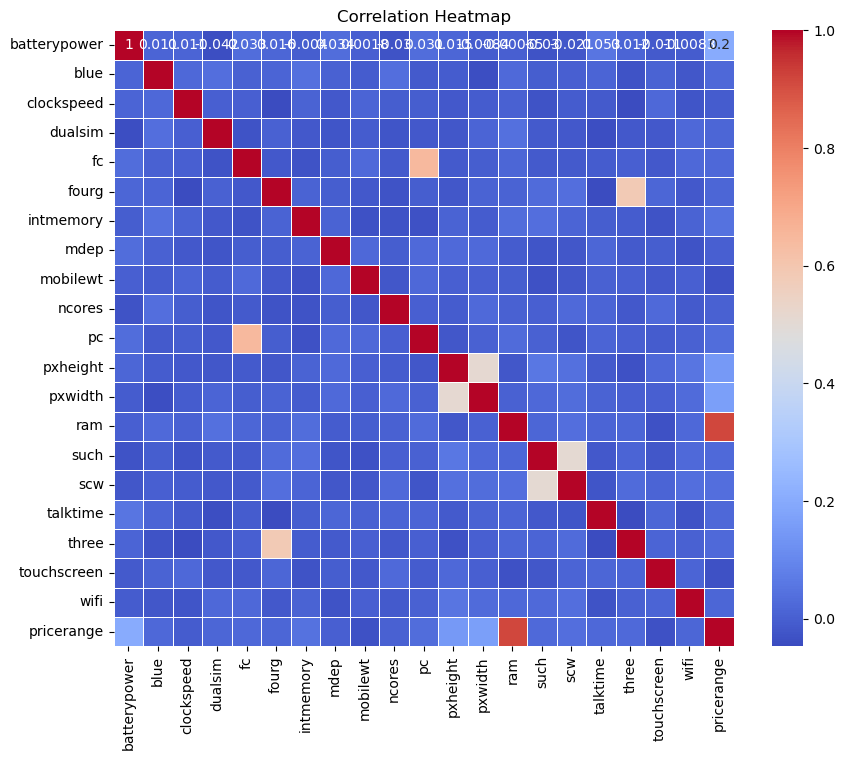

In [151]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
corr_matrix_3top=pd.DataFrame(corr_matrix.nlargest(3, 'pricerange'))
corr_matrix_3top

batterypower      blue  clockspeed   dualsim        fc  \
pricerange        0.200723  0.020573   -0.006606  0.017444  0.021998   
ram              -0.000653  0.026351    0.003443  0.041072  0.015099   
batterypower      1.000000  0.011252    0.011482 -0.041847  0.033334   

                 fourg  intmemory      mdep  mobilewt    ncores  ...  \
pricerange    0.014772   0.044435  0.000853 -0.030302  0.004399  ...   
ram           0.007313   0.032813 -0.009434 -0.002581  0.004868  ...   
batterypower  0.015665  -0.004004  0.034085  0.001844 -0.029727  ...   

              pxheight   pxwidth       ram      such       scw  talktime  \
pricerange    0.148858  0.165818  0.917046  0.022986  0.038711  0.021859   
ram          -0.020352  0.004105  1.000000  0.015996  0.035576  0.010820   
batterypower  0.014901 -0.008402 -0.000653 -0.029959 -0.021421  0.052510   

                 three  touchscreen      wifi  pricerange  
pricerange    0.023611    -0.030411  0.018785    1.000000  
ram           0.015795    -0.030455  0.022669    0.917046  
batterypower  0.011522    -0.010516 -0.008343    0.200723  

[3 rows x 21 columns]

According to corr_matrix, 'ram' has the most correlation with 'pricerange'.
So,in visualization we can concider the plot between "price range', 'ram, and 'batterypower'

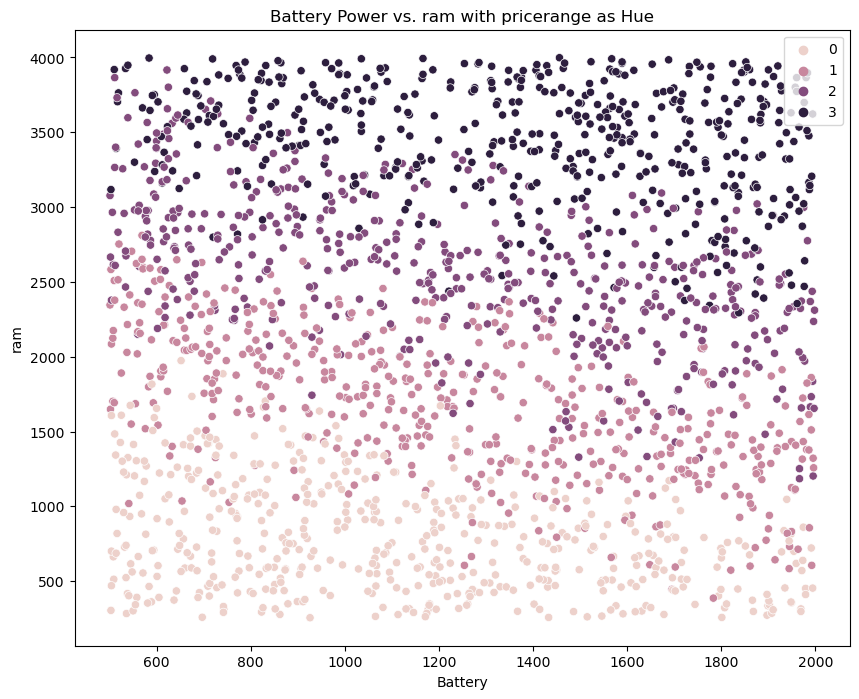

In [152]:

# Create a scatter plot with hue
plt.figure(figsize=(10, 8))
sns.scatterplot( x='batterypower', y='ram', hue='pricerange',data=df)
plt.legend(loc='upper right')  # Change the legend position to upper right
plt.title("Battery Power vs. ram with pricerange as Hue")
plt.xlabel('Battery')
plt.ylabel('ram')
plt.show()





In [19]:
df_sorted = df.sort_values(by="batterypower")

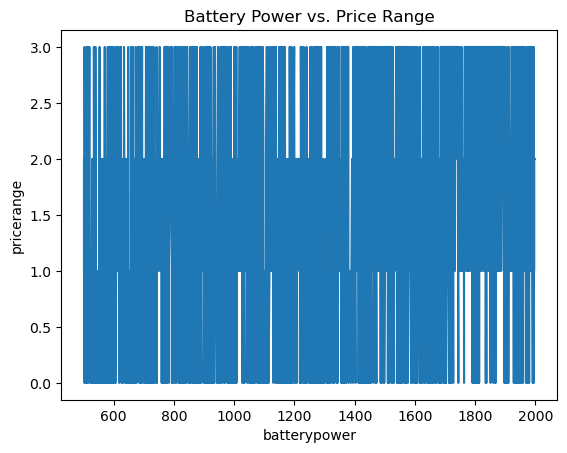

In [20]:
plt.plot(df_sorted["batterypower"], df_sorted["pricerange"])
plt.xlabel("batterypower")
plt.ylabel("pricerange")
plt.title("Battery Power vs. Price Range")
plt.show()

In [21]:
# these kinds of plots  can not been explained. So, we apply other kinds of plots to investigate the distribution and correlation of dataset
#Since, the dataset has both categorical and continous features, scatter plots can not work well. 
#Histogram: For visualizing the distribution of a continuous variable.
#Bar Plot: Suitable for displaying the distribution of categorical data.
#Box Plot: Great for summarizing the distribution of a continuous variable and identifying outliers.


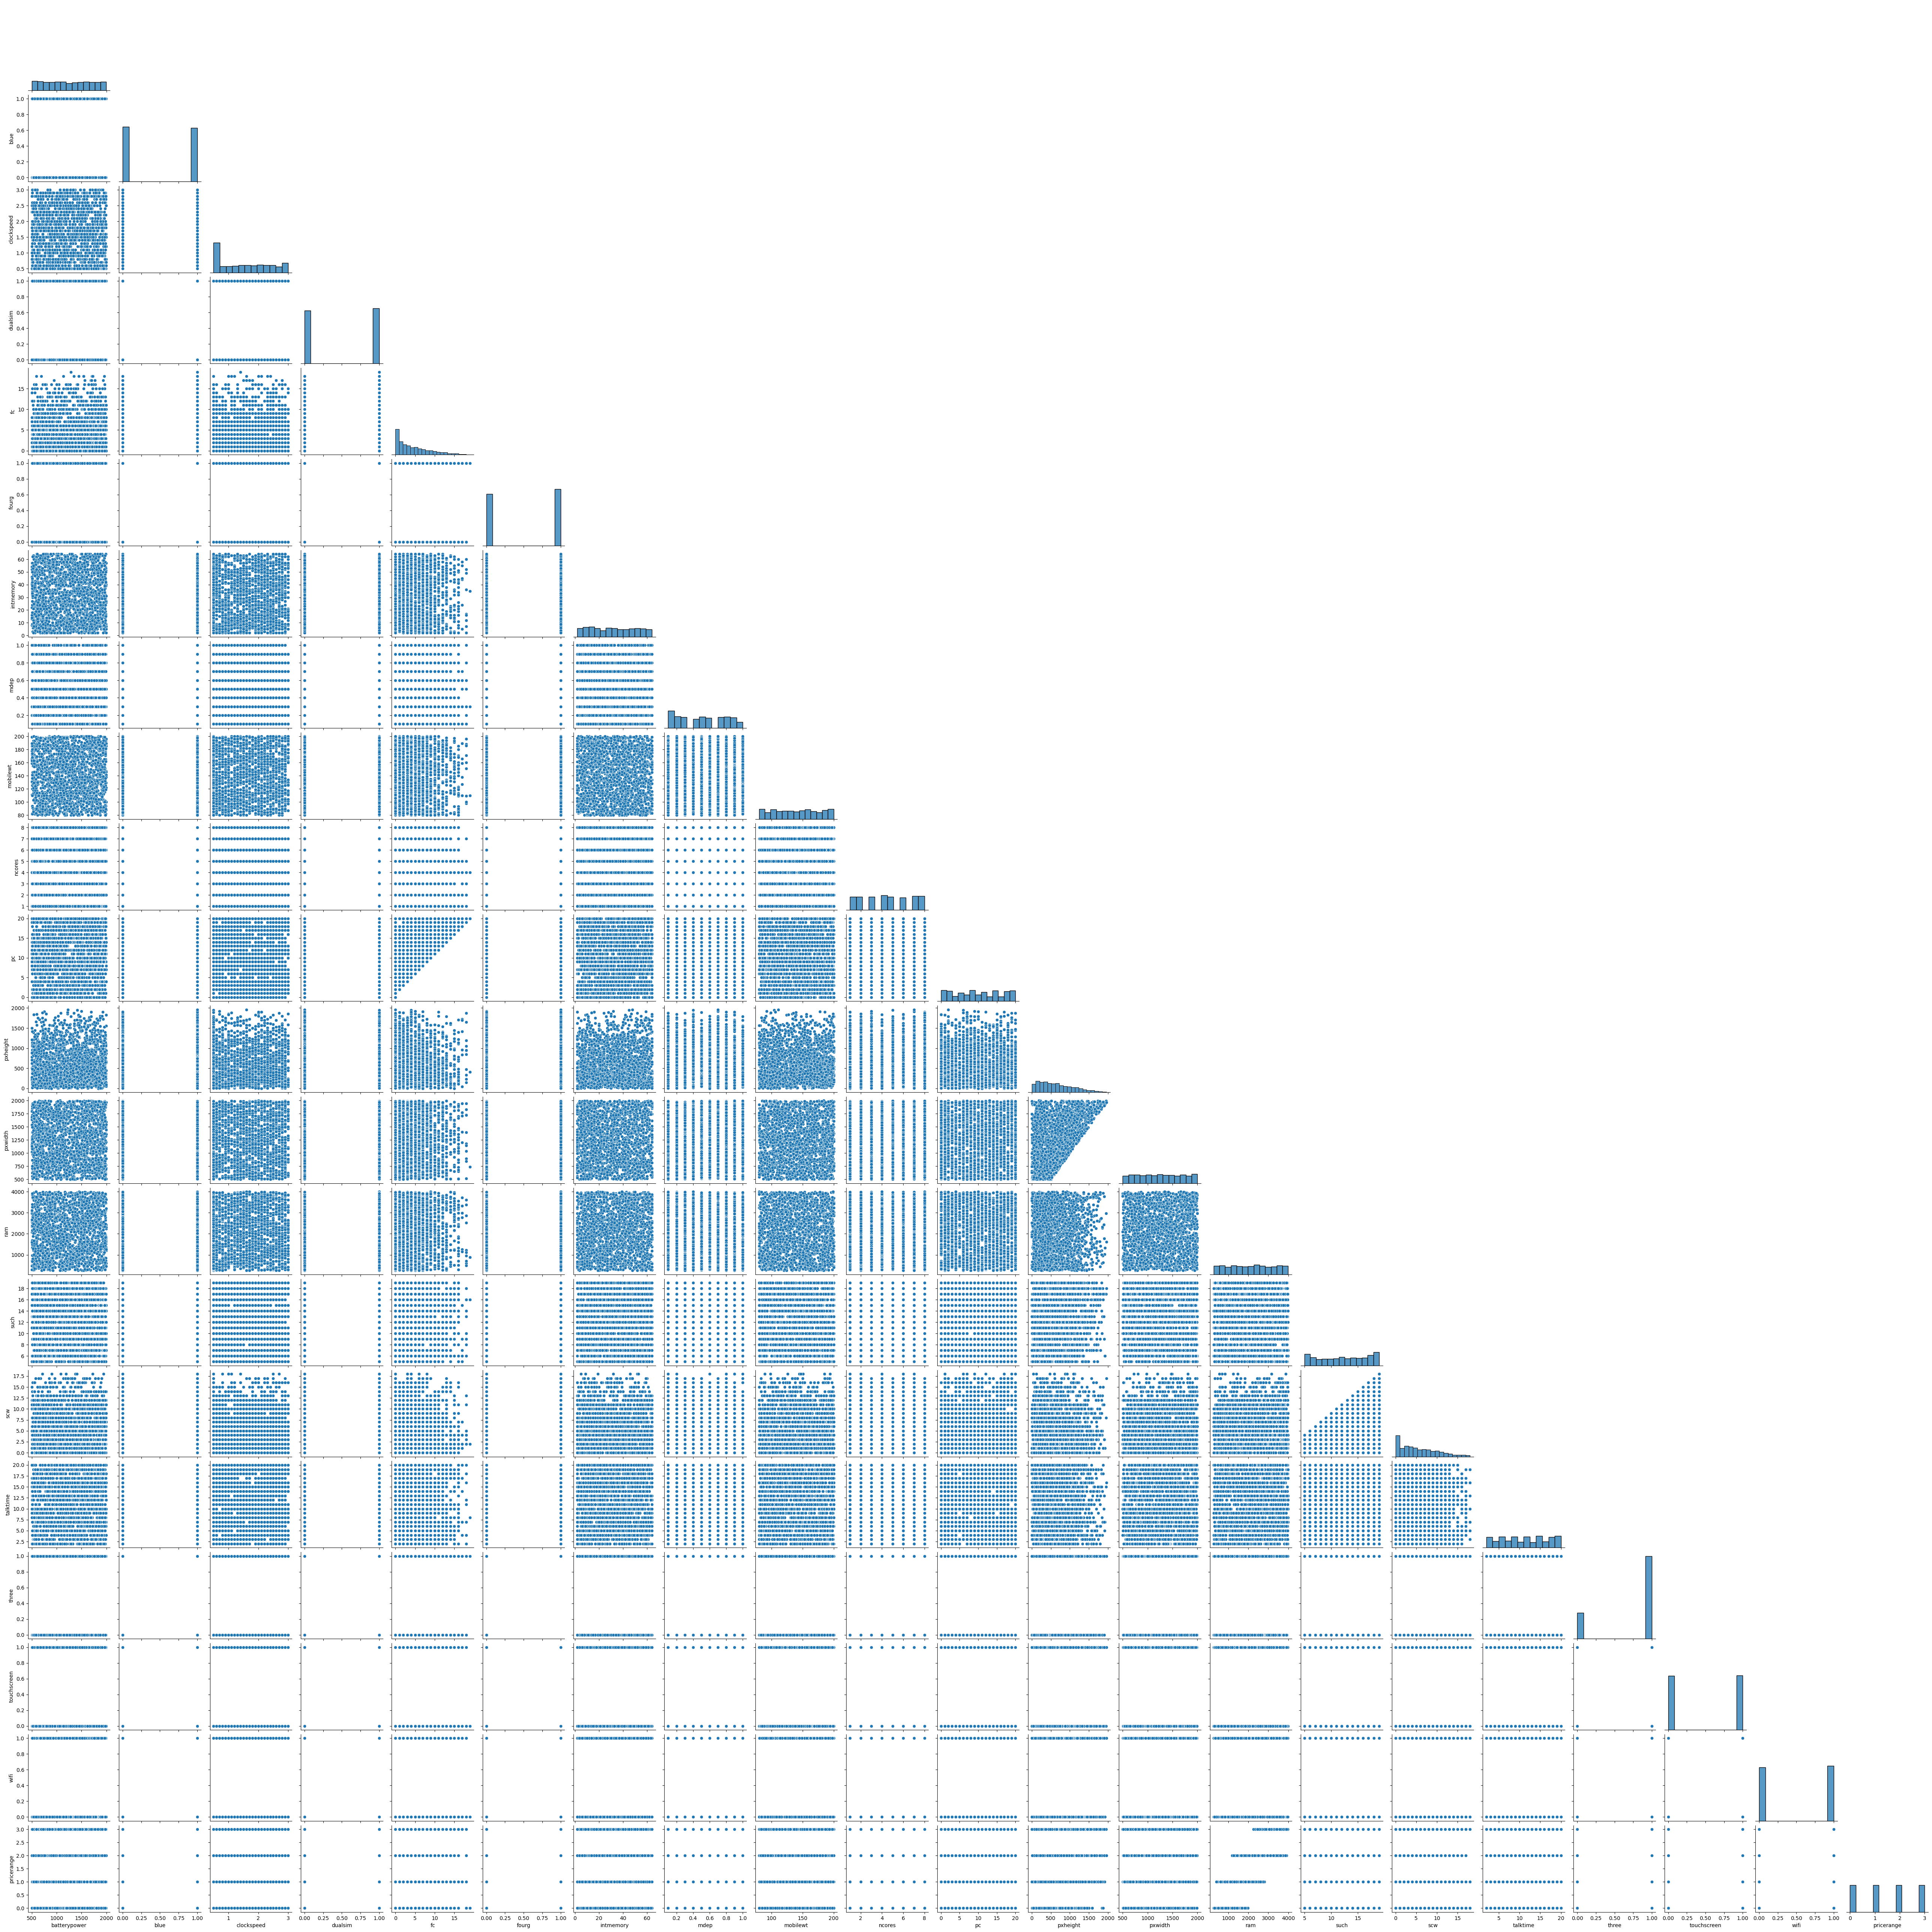

In [22]:
# Create a pair plot
# Plot only the lower triangle of the pair plot
sns.pairplot(df, corner='lower')
plt.show()

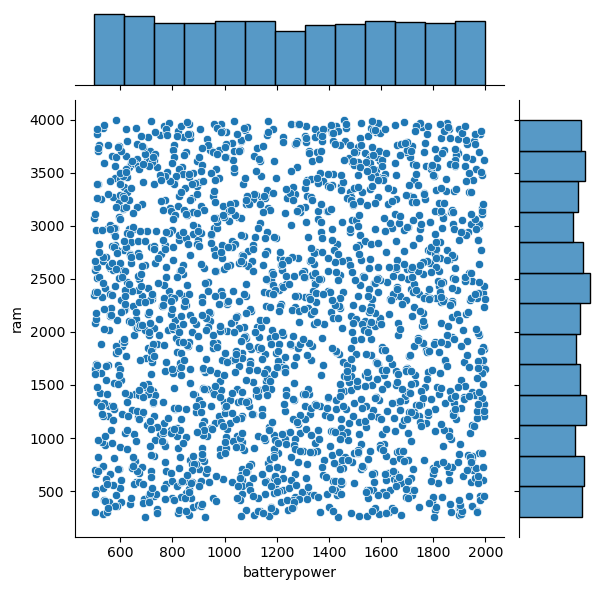

In [23]:
                                                                      # joint plot
#useful for understanding the correlation between two continuous variables


sns.jointplot(x="batterypower", y="ram", data=df)

plt.show()


In [24]:
df.columns

Index(['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       'pricerange'],
      dtype='object')

In [25]:
df.head(3)

batterypower  blue  clockspeed  dualsim  fc  fourg  intmemory  mdep  \
0           842     0         2.2        0   1      0          7   0.6   
1          1021     1         0.5        1   0      1         53   0.7   
2           563     1         0.5        1   2      1         41   0.9   

   mobilewt  ncores  ...  pxheight  pxwidth   ram  such  scw  talktime  three  \
0       188       2  ...        20      756  2549     9    7        19      0   
1       136       3  ...       905     1988  2631    17    3         7      1   
2       145       5  ...      1263     1716  2603    11    2         9      1   

   touchscreen  wifi  pricerange  
0            0     1           1  
1            1     0           2  
2            1     0           2  

[3 rows x 21 columns]

In [26]:
#  continuous columns 
continuous_columns=['batterypower','clockspeed', 'intmemory', 'mdep', 'mobilewt','pxheight',  'pxheight', 'ram','such',
                   'scw', 'talktime' ]
#Categorical colummns
Categorical_col=['blue','dualsim',  'fc', 'fourg', 'three', 'touchscreen', 'wifi','pricerange' ]

                                                Visualization Part 1
                                       Visualization for Continuous columns

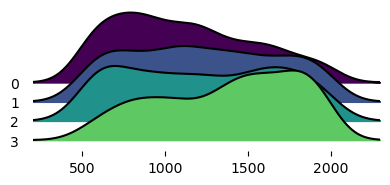

In [27]:
                                                                   #ridgeline plot
#visualize the distribution of a numeric variable for different categories or groups.
# It displays the density of each group's distribution

# Create a ridgeline plot
import joypy
fig, ax = joypy.joyplot(df, by="pricerange", column="batterypower", figsize=(4,2), colormap=plt.cm.viridis)
plt.show()


In [28]:
# It displays the density of each group's distribution.
#for example, phones with batterypower between 1300_1900 are more likely to belong to the rangeprice=3!

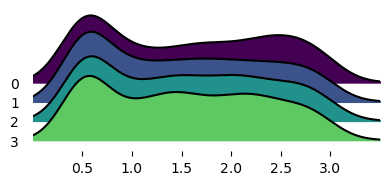

In [29]:
# Create a ridgeline plot for  pricerange and clockspeed
fig, ax = joypy.joyplot(df, by="pricerange", column="clockspeed", figsize=(4,2), colormap=plt.cm.viridis)
plt.show()

In [30]:
#it seems that distribution of clockspeed has no significant effect on determining procerange

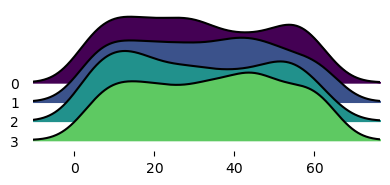

In [31]:
# Create a ridgeline plot
fig, ax = joypy.joyplot(df, by="pricerange", column="intmemory", figsize=(4,2), colormap=plt.cm.viridis)
plt.show()

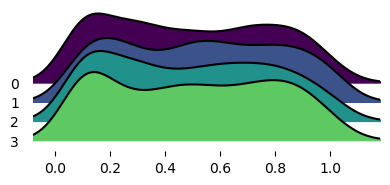

In [32]:
# Create a ridgeline plot
fig, ax = joypy.joyplot(df, by="pricerange", column="mdep", figsize=(4, 2), colormap=plt.cm.viridis)
plt.show()

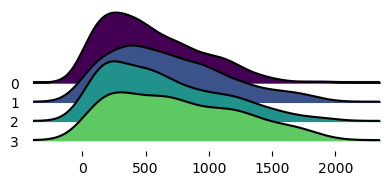

In [33]:
# Create a ridgeline plot between pricerange & pxheight
fig, ax = joypy.joyplot(df, by="pricerange", column="pxheight", figsize=(4, 2), colormap=plt.cm.viridis)
plt.show()

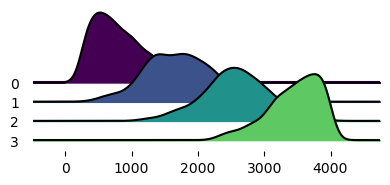

In [34]:
# Create a ridgeline plot between pricerange & ram
fig, ax = joypy.joyplot(df, by="pricerange", column="ram", figsize=(4,2), colormap=plt.cm.viridis)
plt.show()

In [35]:
# it shows the impact of ram capacity on determining the mobile price vividly.
#Maybe, it shows that the more the ram capacity increases, the more prices increases!

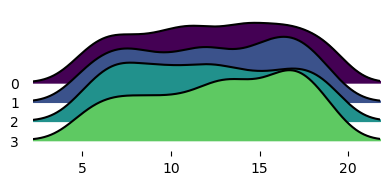

In [36]:
# Create a ridgeline plot
fig, ax = joypy.joyplot(df, by="pricerange", column="such", figsize=(4,2), colormap=plt.cm.viridis)
plt.show()

In [37]:
#'such' feature does not play a pivotal role in pricerange

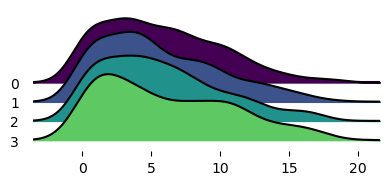

In [38]:
# Create a ridgeline plot between pricerange & scw
fig, ax = joypy.joyplot(df, by="pricerange", column="scw", figsize=(4,2), colormap=plt.cm.viridis)
plt.show()

In [39]:
#it seems that scw feature has a left-skewed Gaussian distribution

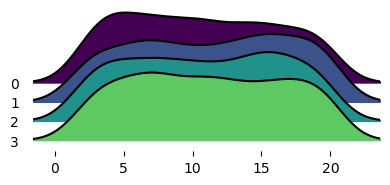

In [40]:
# Create a ridgeline plot
fig, ax = joypy.joyplot(df, by="pricerange", column="talktime", figsize=(4,2), colormap=plt.cm.viridis)
plt.show()

In [41]:
unique_battery_power = df['batterypower'].unique()
print(unique_battery_power)


[ 842 1021  563 ... 1139 1467  858]


In [42]:
df_sorted = df.sort_values(by="blue")

                                            Visualization Part 2:  visualization for categrical columns


In [43]:
#Categorical colummns
Categorical_col=['blue','dualsim',  'fc', 'fourg', 'three', 'touchscreen', 'wifi','pricerange' ]

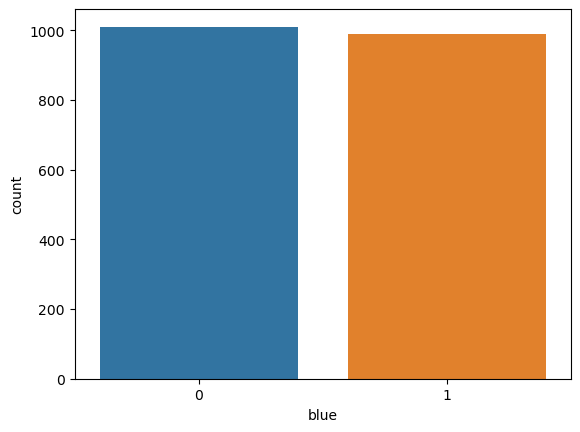

In [44]:
# Create a countplot for blue
sns.countplot(x="blue", data=df)


plt.show()


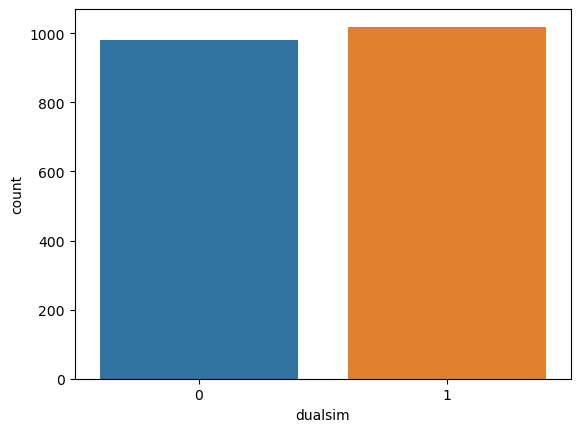

In [45]:
# Create a countplot for dualsim
sns.countplot(x="dualsim", data=df)
plt.show()

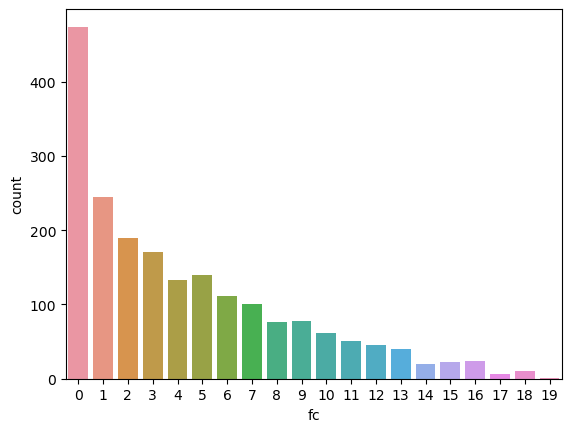

In [46]:
# Create a countplot for fc
sns.countplot(x="fc", data=df)

plt.show()

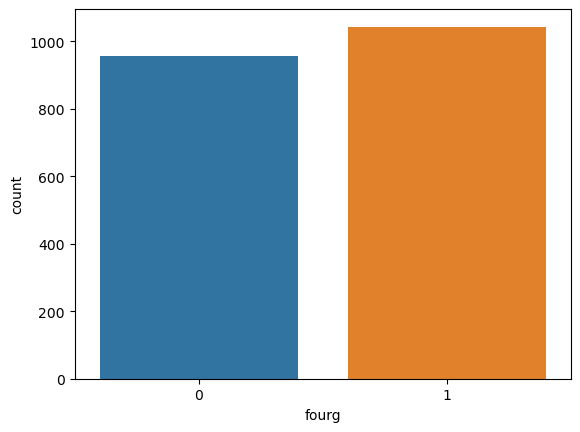

In [47]:
# Create a countplot for fourg
sns.countplot(x="fourg", data=df)
plt.show()

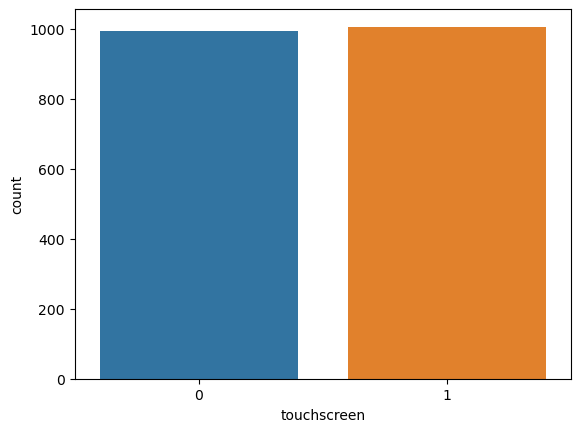

In [48]:
# Create a countplot for touchscreen
sns.countplot(x="touchscreen", data=df)

plt.show()

In [49]:

########### حذف داده هایی که pc برابر با صفر دارند. 

df2 = df[df['pc'] != 0]
df2.shape

(1899, 21)

In [50]:
unique_values = df["pxheight"].unique()
unique_values.sort()
print(unique_values)

[   0    1    2 ... 1920 1949 1960]


In [51]:
df3 = df2[df2['pc'] != 0]
df3.shape

(1899, 21)

In [52]:
unique_values = df["scw"].unique()
unique_values.sort()
print(unique_values)
df4=df3[df3["scw"]!=0]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


                                                       Machine Learning 

In [53]:
df4.columns

Index(['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       'pricerange'],
      dtype='object')

In [54]:
x=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df4.pricerange.values.reshape(-1, 1)
x

batterypower  blue  clockspeed  dualsim  fc  fourg  intmemory  mdep  \
0              842     0         2.2        0   1      0          7   0.6   
1             1021     1         0.5        1   0      1         53   0.7   
2              563     1         0.5        1   2      1         41   0.9   
3              615     1         2.5        0   0      0         10   0.8   
4             1821     1         1.2        0  13      1         44   0.6   
...            ...   ...         ...      ...  ..    ...        ...   ...   
1995           794     1         0.5        1   0      1          2   0.8   
1996          1965     1         2.6        1   0      0         39   0.2   
1997          1911     0         0.9        1   1      1         36   0.7   
1998          1512     0         0.9        0   4      1         46   0.1   
1999           510     1         2.0        1   5      1         45   0.9   

      mobilewt  ncores  pc  pxheight  pxwidth   ram  such  scw  talktime  \
0          188       2   2        20      756  2549     9    7        19   
1          136       3   6       905     1988  2631    17    3         7   
2          145       5   6      1263     1716  2603    11    2         9   
3          131       6   9      1216     1786  2769    16    8        11   
4          141       2  14      1208     1212  1411     8    2        15   
...        ...     ...  ..       ...      ...   ...   ...  ...       ...   
1995       106       6  14      1222     1890   668    13    4        19   
1996       187       4   3       915     1965  2032    11   10        16   
1997       108       8   3       868     1632  3057     9    1         5   
1998       145       5   5       336      670   869    18   10        19   
1999       168       6  16       483      754  3919    19    4         2   

      three  touchscreen  wifi  
0         0            0     1  
1         1            1     0  
2         1            1     0  
3         1            0     0  
4         1            1     0  
...     ...          ...   ...  
1995      1            1     0  
1996      1            1     1  
1997      1            1     0  
1998      1            1     1  
1999      1            1     1  

[1732 rows x 20 columns]

Corr=df4.corr()
print(Corr.max())
print(Corr.min())

In [55]:
# scaling
from sklearn.preprocessing import StandardScaler        # for Scalling
Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)

In [56]:
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)

In [57]:
##  normalize
from sklearn import preprocessing 
normalized_df= preprocessing.normalize(df)
print (normalized_df)

[[3.01210285e-01 0.00000000e+00 7.87010246e-04 ... 0.00000000e+00
  3.57731930e-04 3.57731930e-04]
 [2.85853380e-01 2.79973928e-04 1.39986964e-04 ... 2.79973928e-04
  0.00000000e+00 5.59947856e-04]
 [1.64909239e-01 2.92911615e-04 1.46455808e-04 ... 2.92911615e-04
  0.00000000e+00 5.85823231e-04]
 ...
 [4.71497362e-01 0.00000000e+00 2.22055273e-04 ... 2.46728081e-04
  0.00000000e+00 7.40184242e-04]
 [7.93911617e-01 0.00000000e+00 4.72566439e-04 ... 5.25073821e-04
  5.25073821e-04 0.00000000e+00]
 [1.25738511e-01 2.46546099e-04 4.93092199e-04 ... 2.46546099e-04
  2.46546099e-04 7.39638298e-04]]


                                                                1. DTs

In [58]:
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)

In [59]:
Decision_Tree=DecisionTreeClassifier(max_depth=3)
Decision_Tree.fit(X_train, y_train)
y_pred=Decision_Tree.predict(X_test) 

In [60]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7826923076923077


In [61]:
# Evaluation 
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

0.7826923076923077
[[119   9   0   0]
 [ 18  79  26   0]
 [  0  18  87  24]
 [  0   0  18 122]]


In [62]:
Decision_Tree=DecisionTreeClassifier(criterion="entropy", max_depth=3)
Decision_Tree=Decision_Tree.fit(X_train, y_train)
y_pred=Decision_Tree.predict(X_test)

In [63]:
# Evaluation 
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

0.7634615384615384
[[105  23   0   0]
 [ 14  83  26   0]
 [  0  18  87  24]
 [  0   0  18 122]]


In [64]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7634615384615384


                                                   Improving DTs Model 
                                                  1. Cross Validation

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Model definition
Decision_Tree = DecisionTreeClassifier(max_depth=3)

# Different k values for k-fold cross-validation
k_values = [3, 5, 10]

# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(Decision_Tree, x_Scaled, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)

KFold=3 | Accuracy: 0.7523 | Standard Deviation: 0.0091
[0.74221453 0.75043328 0.76429809]
KFold=5 | Accuracy: 0.7517 | Standard Deviation: 0.0112
[0.73775216 0.74639769 0.76011561 0.76878613 0.74566474]
KFold=10 | Accuracy: 0.7535 | Standard Deviation: 0.0241
[0.77011494 0.71264368 0.78612717 0.75144509 0.74566474 0.74566474
 0.79768786 0.74566474 0.7283237  0.75144509]


                                                                improving Dts
                                                                2. Test Size

In [153]:

# Decision Tree model with max_depth of 3
Decision_Tree = DecisionTreeClassifier(max_depth=3)

# Test sizes to evaluate
test_sizes = np.arange(0.10, 0.35, 0.01)

# Evaluate the model with different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=test_size, random_state=1)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'Test Size: {test_size:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')
 

Test Size: 0.10, Accuracy: 0.89, Precision: 0.88, Recall: 0.88, F1 Score: 0.88
Test Size: 0.11, Accuracy: 0.90, Precision: 0.90, Recall: 0.89, F1 Score: 0.89
Test Size: 0.12, Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1 Score: 0.88
Test Size: 0.13, Accuracy: 0.86, Precision: 0.86, Recall: 0.86, F1 Score: 0.86
Test Size: 0.14, Accuracy: 0.84, Precision: 0.84, Recall: 0.84, F1 Score: 0.84
Test Size: 0.15, Accuracy: 0.86, Precision: 0.85, Recall: 0.85, F1 Score: 0.85
Test Size: 0.16, Accuracy: 0.85, Precision: 0.85, Recall: 0.85, F1 Score: 0.85
Test Size: 0.17, Accuracy: 0.84, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.18, Accuracy: 0.83, Precision: 0.82, Recall: 0.82, F1 Score: 0.82
Test Size: 0.19, Accuracy: 0.85, Precision: 0.84, Recall: 0.84, F1 Score: 0.84
Test Size: 0.20, Accuracy: 0.82, Precision: 0.81, Recall: 0.81, F1 Score: 0.81
Test Size: 0.21, Accuracy: 0.82, Precision: 0.82, Recall: 0.82, F1 Score: 0.82
Test Size: 0.22, Accuracy: 0.83, Precision: 0.83, Re

testsize=0.11 has the most accuracy
accuracy=0.90>0.36

                                                      Improving DTs Modeling 
                                                       3. Tuning Parameters

In [67]:
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.11, random_state=1)# the best testsize

In [150]:



X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=0.2, random_state=1)

# Define Parameter Grid
param_grid = {
    "criterion": ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Print the best score
print("Best cross-validation accuracy score: ", grid_search.best_score_)


Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation accuracy score:  0.5509025270758123


Tuning Parameters did not worke for DTs! 

In [69]:
#Evaluate the Best Model


X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=0.11, random_state=1)# scaled and the best test size 
# Evaluate the best model on the test set
Decision_Tree=DecisionTreeClassifier(criterion="entropy", max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2)#the best hypertuning 
Decision_Tree=Decision_Tree.fit(X_train, y_train)
y_pred=Decision_Tree.predict(X_test)

# Evaluation 
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))


0.5445026178010471
[[31 14  1  3]
 [19 13  9  5]
 [ 5  4 28 10]
 [ 3  6  8 32]]


Hypertuning does not work!

                                                           2.Random Forest

In [70]:
x=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df4.pricerange.values.reshape(-1, 1)

# scaling
from sklearn.preprocessing import StandardScaler        # for Scalling
Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)
##  normalize
from sklearn import preprocessing 
normalized_df= preprocessing.normalize(df)
print (normalized_df)

[[3.01210285e-01 0.00000000e+00 7.87010246e-04 ... 0.00000000e+00
  3.57731930e-04 3.57731930e-04]
 [2.85853380e-01 2.79973928e-04 1.39986964e-04 ... 2.79973928e-04
  0.00000000e+00 5.59947856e-04]
 [1.64909239e-01 2.92911615e-04 1.46455808e-04 ... 2.92911615e-04
  0.00000000e+00 5.85823231e-04]
 ...
 [4.71497362e-01 0.00000000e+00 2.22055273e-04 ... 2.46728081e-04
  0.00000000e+00 7.40184242e-04]
 [7.93911617e-01 0.00000000e+00 4.72566439e-04 ... 5.25073821e-04
  5.25073821e-04 0.00000000e+00]
 [1.25738511e-01 2.46546099e-04 4.93092199e-04 ... 2.46546099e-04
  2.46546099e-04 7.39638298e-04]]


In [71]:
clf=RandomForestClassifier(n_estimators=50, max_depth=3)
clf=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.801923076923077
0.801923076923077
[[121   7   0   0]
 [ 26  76  21   0]
 [  0  16  90  23]
 [  0   0  10 130]]


                                                         I. Cross Validation of RandomForest

In [72]:
df.columns

Index(['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       'pricerange'],
      dtype='object')

In [73]:

# Initialize the model
clf = RandomForestClassifier(random_state=42)

# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x_Scaled, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)


KFold=3 | Accuracy: 0.8614 | Standard Deviation: 0.0094
[0.87370242 0.85961872 0.85095321]
KFold=5 | Accuracy: 0.8736 | Standard Deviation: 0.0155
[0.89048991 0.85014409 0.87283237 0.89017341 0.86416185]
KFold=10 | Accuracy: 0.8747 | Standard Deviation: 0.0225
[0.8908046  0.91954023 0.85549133 0.84971098 0.85549133 0.87283237
 0.90751445 0.86127168 0.86127168 0.87283237]


In [ ]:
                                              Applying Cross Validation 

In [74]:
df4

batterypower  blue  clockspeed  dualsim  fc  fourg  intmemory  mdep  \
0              842     0         2.2        0   1      0          7   0.6   
1             1021     1         0.5        1   0      1         53   0.7   
2              563     1         0.5        1   2      1         41   0.9   
3              615     1         2.5        0   0      0         10   0.8   
4             1821     1         1.2        0  13      1         44   0.6   
...            ...   ...         ...      ...  ..    ...        ...   ...   
1995           794     1         0.5        1   0      1          2   0.8   
1996          1965     1         2.6        1   0      0         39   0.2   
1997          1911     0         0.9        1   1      1         36   0.7   
1998          1512     0         0.9        0   4      1         46   0.1   
1999           510     1         2.0        1   5      1         45   0.9   

      mobilewt  ncores  ...  pxheight  pxwidth   ram  such  scw  talktime  \
0          188       2  ...        20      756  2549     9    7        19   
1          136       3  ...       905     1988  2631    17    3         7   
2          145       5  ...      1263     1716  2603    11    2         9   
3          131       6  ...      1216     1786  2769    16    8        11   
4          141       2  ...      1208     1212  1411     8    2        15   
...        ...     ...  ...       ...      ...   ...   ...  ...       ...   
1995       106       6  ...      1222     1890   668    13    4        19   
1996       187       4  ...       915     1965  2032    11   10        16   
1997       108       8  ...       868     1632  3057     9    1         5   
1998       145       5  ...       336      670   869    18   10        19   
1999       168       6  ...       483      754  3919    19    4         2   

      three  touchscreen  wifi  pricerange  
0         0            0     1           1  
1         1            1     0           2  
2         1            1     0           2  
3         1            0     0           2  
4         1            1     0           1  
...     ...          ...   ...         ...  
1995      1            1     0           0  
1996      1            1     1           2  
1997      1            1     0           3  
1998      1            1     1           0  
1999      1            1     1           3  

[1732 rows x 21 columns]

In [108]:
df4_1=df4.iloc[0:347, 0:22]
df4_2=df4.iloc[866: ,0:22 ]
df5 = pd.concat([df4_1, df4_2], axis=0)
df5 = df5.reset_index(drop=True)
df5

batterypower  blue  clockspeed  dualsim  fc  fourg  intmemory  mdep  \
0              842     0         2.2        0   1      0          7   0.6   
1             1021     1         0.5        1   0      1         53   0.7   
2              563     1         0.5        1   2      1         41   0.9   
3              615     1         2.5        0   0      0         10   0.8   
4             1821     1         1.2        0  13      1         44   0.6   
...            ...   ...         ...      ...  ..    ...        ...   ...   
1208           794     1         0.5        1   0      1          2   0.8   
1209          1965     1         2.6        1   0      0         39   0.2   
1210          1911     0         0.9        1   1      1         36   0.7   
1211          1512     0         0.9        0   4      1         46   0.1   
1212           510     1         2.0        1   5      1         45   0.9   

      mobilewt  ncores  ...  pxheight  pxwidth   ram  such  scw  talktime  \
0          188       2  ...        20      756  2549     9    7        19   
1          136       3  ...       905     1988  2631    17    3         7   
2          145       5  ...      1263     1716  2603    11    2         9   
3          131       6  ...      1216     1786  2769    16    8        11   
4          141       2  ...      1208     1212  1411     8    2        15   
...        ...     ...  ...       ...      ...   ...   ...  ...       ...   
1208       106       6  ...      1222     1890   668    13    4        19   
1209       187       4  ...       915     1965  2032    11   10        16   
1210       108       8  ...       868     1632  3057     9    1         5   
1211       145       5  ...       336      670   869    18   10        19   
1212       168       6  ...       483      754  3919    19    4         2   

      three  touchscreen  wifi  pricerange  
0         0            0     1           1  
1         1            1     0           2  
2         1            1     0           2  
3         1            0     0           2  
4         1            1     0           1  
...     ...          ...   ...         ...  
1208      1            1     0           0  
1209      1            1     1           2  
1210      1            1     0           3  
1211      1            1     1           0  
1212      1            1     1           3  

[1213 rows x 21 columns]

In [154]:
x=pd.DataFrame(df5, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df5.pricerange.values.reshape(-1, 1)

# scaling     
Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)
# model
clf=RandomForestClassifier(n_estimators=50, max_depth=3)
clf=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.7802197802197802
0.7802197802197802
[[89  3  0  0]
 [19 47 10  1]
 [ 0 21 51 22]
 [ 0  0  4 97]]


                                                     improving RandomForestClassifier 
                                                            test Size

In [76]:

# Test sizes to evaluate
test_sizes = np.arange(0.10, 0.35, 0.01)

# Evaluate the model with different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=test_size, random_state=1)
    clf = clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'Test Size: {test_size:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Test Size: 0.10, Accuracy: 0.85, Precision: 0.85, Recall: 0.84, F1 Score: 0.84
Test Size: 0.11, Accuracy: 0.84, Precision: 0.84, Recall: 0.83, F1 Score: 0.83
Test Size: 0.12, Accuracy: 0.84, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.13, Accuracy: 0.84, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.14, Accuracy: 0.84, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.15, Accuracy: 0.84, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.16, Accuracy: 0.83, Precision: 0.83, Recall: 0.83, F1 Score: 0.82
Test Size: 0.17, Accuracy: 0.84, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.18, Accuracy: 0.84, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.19, Accuracy: 0.85, Precision: 0.84, Recall: 0.84, F1 Score: 0.84
Test Size: 0.20, Accuracy: 0.83, Precision: 0.83, Recall: 0.83, F1 Score: 0.83
Test Size: 0.21, Accuracy: 0.83, Precision: 0.82, Recall: 0.83, F1 Score: 0.82
Test Size: 0.22, Accuracy: 0.83, Precision: 0.82, Re

Test Size: 0.10
Accuracy=85
it did not improve the Random Forest model

                                             Improving RandomForestClassifier
                                            Hyperparameter Tuning with Grid Search

In [77]:


# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Evaluate on the test set with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {test_accuracy:.4f}')


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8618
Test Set Accuracy: 0.8812


Accuracy improved by hypertuning: 0.8812 > 85.0

                                                           3.SVM

In [78]:
x=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df4.pricerange.values.reshape(-1, 1)
# scaling
from sklearn.preprocessing import StandardScaler        # for Scalling
Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)

                                                SVM
                                          1. Kernel=rbf

In [79]:

svm_rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)

y_pred=svm_rbf.predict(X_test)
# Evaluation 
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', acc)

print(metrics.confusion_matrix(y_test, y_pred))

Accuracy : 0.8846153846153846
[[120   8   0   0]
 [  8 106   9   0]
 [  0  16 105   8]
 [  0   0  11 129]]


Accuracy=0.88

                                                        improving SVM_rbf
                                                      Cross Validation

In [80]:


# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(svm_rbf, x_Scaled, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)


KFold=3 | Accuracy: 0.8470 | Standard Deviation: 0.0022
[0.84775087 0.8492201  0.8440208 ]
KFold=5 | Accuracy: 0.8574 | Standard Deviation: 0.0171
[0.870317   0.82420749 0.8583815  0.86705202 0.86705202]
KFold=10 | Accuracy: 0.8626 | Standard Deviation: 0.0254
[0.90804598 0.85057471 0.84971098 0.82080925 0.89017341 0.84971098
 0.85549133 0.87861272 0.83815029 0.88439306]


Accuracy=0.0.8626 <0.88

                                                            improving SVM_rbf
                                                                test size

In [81]:
# Test sizes to evaluate
test_sizes = np.arange(0.10, 0.35, 0.01)

# Evaluate the model with different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=test_size, random_state=1)
    svm_rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)

    svm_rbf.fit(X_train, y_train)
    
    y_pred = svm_rbf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'Test Size: {test_size:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Test Size: 0.10, Accuracy: 0.86, Precision: 0.85, Recall: 0.85, F1 Score: 0.85
Test Size: 0.11, Accuracy: 0.86, Precision: 0.86, Recall: 0.86, F1 Score: 0.86
Test Size: 0.12, Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1 Score: 0.88
Test Size: 0.13, Accuracy: 0.87, Precision: 0.87, Recall: 0.87, F1 Score: 0.87
Test Size: 0.14, Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1 Score: 0.88
Test Size: 0.15, Accuracy: 0.88, Precision: 0.87, Recall: 0.87, F1 Score: 0.87
Test Size: 0.16, Accuracy: 0.88, Precision: 0.87, Recall: 0.87, F1 Score: 0.87
Test Size: 0.17, Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1 Score: 0.88
Test Size: 0.18, Accuracy: 0.88, Precision: 0.87, Recall: 0.87, F1 Score: 0.87
Test Size: 0.19, Accuracy: 0.89, Precision: 0.88, Recall: 0.88, F1 Score: 0.88
Test Size: 0.20, Accuracy: 0.88, Precision: 0.88, Recall: 0.88, F1 Score: 0.88
Test Size: 0.21, Accuracy: 0.89, Precision: 0.89, Recall: 0.89, F1 Score: 0.89
Test Size: 0.22, Accuracy: 0.90, Precision: 0.89, Re

Accuracy=0.90>0.88
test size= 0.22

In [82]:
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.22, random_state=1)

                                                            Improving svm rbf 
                                                                hypertuning

In [83]:
# Define the parameter grid for SVM with RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}


# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Evaluate on the test set with the best estimator
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Evaluation
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9474
Accuracy: 0.9607329842931938
Confusion Matrix:
[[98  1  0  0]
 [ 3 90  1  0]
 [ 0  6 84  1]
 [ 0  0  3 95]]


Hypertuning worked!
Accuracy with Hypertuning :0.9607 > 0.90


                                                              svm poly method

In [155]:
x=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df4.pricerange.values.reshape(-1, 1)
# scaling

Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)

In [156]:
##### POly method 
svm_poly = svm.SVC(kernel='poly', C=1,gamma='auto')
svm_poly.fit(X_train, y_train)
y_pred=svm_poly.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

0.7557692307692307
[[107  21   0   0]
 [  9  89  25   0]
 [  0  23  92  14]
 [  0   0  35 105]]


                                                    improving SVM_poly
                                                      Cross Validation

In [86]:
# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(svm_poly, x_Scaled, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)

KFold=3 | Accuracy: 0.7333 | Standard Deviation: 0.0154
[0.71453287 0.75216638 0.73310225]
KFold=5 | Accuracy: 0.7517 | Standard Deviation: 0.0199
[0.76080692 0.72334294 0.77745665 0.73410405 0.76300578]
KFold=10 | Accuracy: 0.7737 | Standard Deviation: 0.0246
[0.77586207 0.8045977  0.73988439 0.78034682 0.76878613 0.76300578
 0.75144509 0.75144509 0.77456647 0.8265896 ]


Accuracy=0.77>0.755

                                                            improving SVM_poly
                                                                test size

In [87]:

# Test sizes to evaluate
test_sizes = np.arange(0.10, 0.35, 0.01)

# Evaluate the model with different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=test_size, random_state=1)
    svm_poly = svm.SVC(kernel='poly', C=1,gamma='auto')

    svm_poly.fit(X_train, y_train)
    
    y_pred = svm_poly.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'Test Size: {test_size:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Test Size: 0.10, Accuracy: 0.78, Precision: 0.79, Recall: 0.78, F1 Score: 0.78
Test Size: 0.11, Accuracy: 0.78, Precision: 0.79, Recall: 0.78, F1 Score: 0.78
Test Size: 0.12, Accuracy: 0.79, Precision: 0.79, Recall: 0.79, F1 Score: 0.79
Test Size: 0.13, Accuracy: 0.79, Precision: 0.79, Recall: 0.78, F1 Score: 0.79
Test Size: 0.14, Accuracy: 0.78, Precision: 0.79, Recall: 0.78, F1 Score: 0.78
Test Size: 0.15, Accuracy: 0.78, Precision: 0.79, Recall: 0.78, F1 Score: 0.78
Test Size: 0.16, Accuracy: 0.78, Precision: 0.78, Recall: 0.77, F1 Score: 0.78
Test Size: 0.17, Accuracy: 0.78, Precision: 0.78, Recall: 0.78, F1 Score: 0.78
Test Size: 0.18, Accuracy: 0.78, Precision: 0.78, Recall: 0.77, F1 Score: 0.77
Test Size: 0.19, Accuracy: 0.78, Precision: 0.79, Recall: 0.78, F1 Score: 0.78
Test Size: 0.20, Accuracy: 0.76, Precision: 0.78, Recall: 0.76, F1 Score: 0.76
Test Size: 0.21, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.22, Accuracy: 0.77, Precision: 0.78, Re

In [88]:
# Define the parameter grid for SVM with polynomial kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'coef0': [0, 1, 10],
    'kernel': ['poly']
}

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Evaluate on the test set with the best estimator
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Evaluation
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9502
Accuracy: 0.9558573853989814
Confusion Matrix:
[[143   0   0   0]
 [  5 129   6   0]
 [  0   8 134   4]
 [  0   0   3 157]]


Accuracy: 0.9558573853989814> 0.88

                                                                   svm Linear


In [89]:
x=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df4.pricerange.values.reshape(-1, 1)
# scaling
from sklearn.preprocessing import StandardScaler        # for Scalling
Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)

In [90]:
svm_linear = svm.SVC(kernel='linear', C=1,gamma='auto')
svm_linear.fit(X_train, y_train)
y_pred=svm_linear.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

0.9576923076923077
[[127   1   0   0]
 [  4 115   4   0]
 [  0   4 118   7]
 [  0   0   2 138]]


Accuracy=0.9576

                                                                      improving svm_linear
                                                                         cross validation

In [91]:
 # Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(svm_linear, x_Scaled, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)

KFold=3 | Accuracy: 0.9573 | Standard Deviation: 0.0032
[0.9550173  0.96187175 0.95493934]
KFold=5 | Accuracy: 0.9584 | Standard Deviation: 0.0079
[0.96541787 0.96541787 0.95375723 0.94508671 0.96242775]
KFold=10 | Accuracy: 0.9636 | Standard Deviation: 0.0082
[0.97126437 0.95977011 0.95375723 0.97687861 0.95375723 0.96531792
 0.95375723 0.97109827 0.95953757 0.97109827]


Accuracy: 0.9636 >Accuracy=0.8846153846153846

                                                    improving svm_linear
                                                          test_size

In [93]:

# Test sizes to evaluate
test_sizes = np.arange(0.10, 0.35, 0.01)

# Evaluate the model with different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=test_size, random_state=1)
    svm_linear = svm.SVC(kernel='linear', C=1,gamma='auto')
    svm_linear.fit(X_train, y_train)
    
    y_pred = svm_poly.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'Test Size: {test_size:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Test Size: 0.10, Accuracy: 0.76, Precision: 0.78, Recall: 0.76, F1 Score: 0.76
Test Size: 0.11, Accuracy: 0.76, Precision: 0.78, Recall: 0.76, F1 Score: 0.76
Test Size: 0.12, Accuracy: 0.76, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
Test Size: 0.13, Accuracy: 0.77, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
Test Size: 0.14, Accuracy: 0.77, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
Test Size: 0.15, Accuracy: 0.77, Precision: 0.78, Recall: 0.77, F1 Score: 0.77
Test Size: 0.16, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.17, Accuracy: 0.77, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.18, Accuracy: 0.76, Precision: 0.77, Recall: 0.75, F1 Score: 0.76
Test Size: 0.19, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.20, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.21, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.22, Accuracy: 0.76, Precision: 0.77, Re

Accuracy:0.76 < 0.9636

                                                             improving svm_linear
                                                               hypertuning


In [94]:
# Define the parameter grid for SVM with linear kernel
param_grid = {
    'C': [0.1, 1, 10, 100, 1000]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm.SVC(kernel='linear'), param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Evaluate on the test set with the best estimator
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Evaluation
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Best Parameters: {'C': 100}
Best Cross-Validation Score: 0.9685
Accuracy: 0.966044142614601
Confusion Matrix:
[[139   4   0   0]
 [  1 132   7   0]
 [  0   3 139   4]
 [  0   0   1 159]]


Accuracy: 0.96604414261460

                                                              svm_sigmoid

In [95]:
x=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df4.pricerange.values.reshape(-1, 1)
# scaling

Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)

In [96]:
svm_sigmoid = svm.SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train, y_train)
y_pred=svm_sigmoid.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

0.9230769230769231
[[123   5   0   0]
 [  5 117   1   0]
 [  0   8 114   7]
 [  0   0  14 126]]


In [97]:
accuracy>0.88461

False

                                                    cross validation

In [98]:
 # Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(svm_sigmoid, x_Scaled, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)

KFold=3 | Accuracy: 0.9128 | Standard Deviation: 0.0175
[0.89965398 0.90121317 0.93760832]
KFold=5 | Accuracy: 0.9255 | Standard Deviation: 0.0061
[0.92795389 0.91930836 0.92196532 0.93641618 0.92196532]
KFold=10 | Accuracy: 0.9301 | Standard Deviation: 0.0229
[0.95402299 0.9137931  0.95375723 0.9017341  0.94219653 0.91907514
 0.93063584 0.97109827 0.9132948  0.9017341 ]


it works:
Accuracy: 0.9301 > 0.88461

In [99]:
# Test sizes to evaluate
test_sizes = np.arange(0.10, 0.35, 0.01)

# Evaluate the model with different test sizes
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=test_size, random_state=1)
    svm_sigmoid = svm.SVC(kernel='sigmoid')
    svm_sigmoid.fit(X_train, y_train)
    y_pred = svm_poly.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'Test Size: {test_size:.2f}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Test Size: 0.10, Accuracy: 0.76, Precision: 0.78, Recall: 0.76, F1 Score: 0.76
Test Size: 0.11, Accuracy: 0.76, Precision: 0.78, Recall: 0.76, F1 Score: 0.76
Test Size: 0.12, Accuracy: 0.76, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
Test Size: 0.13, Accuracy: 0.77, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
Test Size: 0.14, Accuracy: 0.77, Precision: 0.78, Recall: 0.76, F1 Score: 0.77
Test Size: 0.15, Accuracy: 0.77, Precision: 0.78, Recall: 0.77, F1 Score: 0.77
Test Size: 0.16, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.17, Accuracy: 0.77, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.18, Accuracy: 0.76, Precision: 0.77, Recall: 0.75, F1 Score: 0.76
Test Size: 0.19, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.20, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.21, Accuracy: 0.76, Precision: 0.77, Recall: 0.76, F1 Score: 0.76
Test Size: 0.22, Accuracy: 0.76, Precision: 0.77, Re

Accuracy: 0.77 < Accuracy: 0.9301

In [100]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'coef0': [0, 1, 10],
    'kernel': ['sigmoid']
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.4f}')

# Evaluate on the test set with the best estimator
best_svc = grid_search.best_estimator_
y_pred = best_svc.predict(X_test)

# Evaluation
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Best Parameters: {'C': 100, 'coef0': 0, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best Cross-Validation Score: 0.9440
Accuracy: 0.9592529711375212
Confusion Matrix:
[[143   0   0   0]
 [  5 130   5   0]
 [  0   6 134   6]
 [  0   0   2 158]]


Accuracy: 0.9592529711375212 >  0.9301

In [101]:
svc = svm.SVC(kernel='precomputed', C=1,gamma='auto')
svc=clf.fit(X_train, y_train)
y_pred=svc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

print(metrics.confusion_matrix(y_test, y_pred))

0.8777589134125636
[[137   6   0   0]
 [ 11 118  11   0]
 [  0  19 110  17]
 [  0   0   8 152]]


In [ ]:
                                                        Naive Bayes Modeling 

In [115]:
x=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       ] )
y=df4.pricerange.values.reshape(-1, 1)
# scaling

Scaler = StandardScaler ()
x_Scaled = Scaler.fit_transform (x)
X_train, X_test, y_train, y_test=train_test_split(x_Scaled,y,test_size=0.3, random_state=1)

In [119]:

#Modeling GaussianNB

from sklearn.naive_bayes import GaussianNB

Gaussian=GaussianNB()

Gaussian.fit(X_train, y_train.ravel())
y_pred=Gaussian.predict(X_test)
Accuracy_GaussianNB=metrics.accuracy_score(y_test,  y_pred)
print("Accuracy of GaussianNB", Accuracy_GaussianNB)

Accuracy of GaussianNB 0.8153846153846154


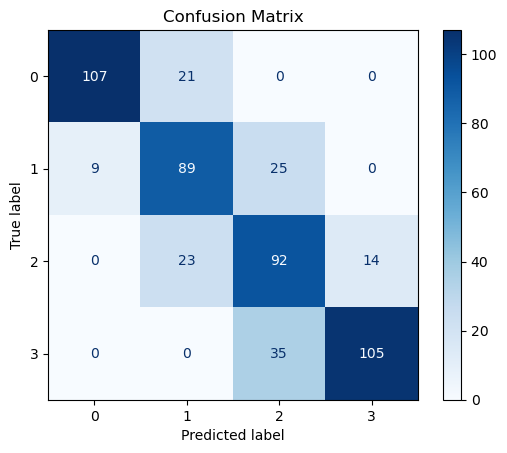

In [157]:
# Confusion Matrix for GaussianNB


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

                                                         Improving GaussianNB
                                                I. Cross Validation for GaussianNB

In [123]:


# Different k values for k-fold cross-validation
k_values = [3, 5, 10]

# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(GaussianNB, x_Scaled, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)

KFold=3 | Accuracy: 0.7887 | Standard Deviation: 0.0177
[0.79584775 0.76429809 0.80589255]
KFold=5 | Accuracy: 0.8031 | Standard Deviation: 0.0221
[0.82997118 0.76945245 0.78612717 0.81213873 0.81791908]
KFold=10 | Accuracy: 0.8037 | Standard Deviation: 0.0343
[0.83908046 0.82758621 0.76878613 0.76300578 0.82080925 0.76878613
 0.86127168 0.76300578 0.79768786 0.8265896 ]


                                           II. Test Size (improving GaussianNB)   

In [129]:
from sklearn.naive_bayes import GaussianNB
# Test sizes to evaluate
test_sizes = np.arange(0.10, 0.35, 0.01)

# Store results
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(x_Scaled, y, test_size=test_size, random_state=42)
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred_tSize = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_tSize)
    precision = precision_score(y_test, y_pred_tSize, average='macro')
    recall = recall_score(y_test, y_pred_tSize, average='macro')
    f1 = f1_score(y_test, y_pred_tSize, average='macro')
    
    results.append({
        'test_size': test_size,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Find and display the top 3 results based on accuracy
top3_accuracy = results_df.nlargest(3, 'accuracy')
print(top3_accuracy)


    test_size  accuracy  precision    recall        f1
0        0.10  0.839080   0.830739  0.829882  0.829986
1        0.11  0.842932   0.833616  0.833558  0.833332
2        0.12  0.850962   0.844953  0.843847  0.844143
3        0.13  0.853982   0.849411  0.847233  0.847934
4        0.14  0.860082   0.855275  0.852960  0.853711
5        0.15  0.857692   0.854204  0.852747  0.853062
6        0.16  0.856115   0.851401  0.850330  0.850396
7        0.17  0.837288   0.833532  0.833399  0.833309
8        0.18  0.826923   0.824908  0.824987  0.824461
9        0.19  0.833333   0.832917  0.832294  0.832502
10       0.20  0.829971   0.829330  0.827562  0.827840
11       0.21  0.818681   0.819552  0.817879  0.818171
12       0.22  0.827225   0.828322  0.827451  0.827605
13       0.23  0.812030   0.811803  0.813978  0.812638
14       0.24  0.790865   0.790835  0.794785  0.792428
15       0.25  0.785219   0.787888  0.789175  0.788411
16       0.26  0.784922   0.787132  0.788644  0.787680
17       0

for test_size  =0.14  : 0.86008 > 0.86008

                                                       Hyperparameter Tuning for GaussinNB

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'var_smoothing': 0.12328467394420659}
Accuracy: 0.806282722513089


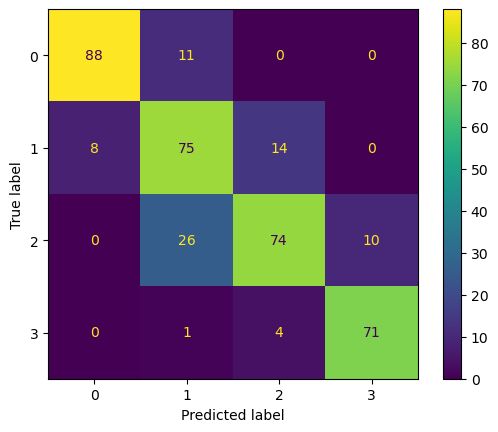

In [130]:
scaler = StandardScaler()
X_selected = scaler.fit_transform(x)

# Train & test split
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.22, random_state=0)

# Initialize the model
Gaussian = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Gaussian, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_gnb = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_gnb.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Show the plot
plt.show()


Hypertuning does not work for Gaussian NB

                                                           Complement Naive Bayes

In [133]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
# Normalize the feature matrix using MinMaxScaler to ensure all values are non-negative
scaler = MinMaxScaler()
X_selected = scaler.fit_transform(x)

# Instantiate the Complement Naive Bayes model
cnb = ComplementNB()

# List of k values for k-fold cross-validation
k_values = [3, 5, 10]

# Perform cross-validation for each k
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(cnb, X_selected, y, cv=kf, scoring='accuracy')
    
    print(f"KFold={k} | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
    print(scores)


KFold=3 | Accuracy: 0.5433 | Standard Deviation: 0.0315
[0.50519031 0.54246101 0.58232236]
KFold=5 | Accuracy: 0.5364 | Standard Deviation: 0.0252
[0.54178674 0.49567723 0.54624277 0.52601156 0.57225434]
KFold=10 | Accuracy: 0.5387 | Standard Deviation: 0.0412
[0.58045977 0.52298851 0.45086705 0.52601156 0.52601156 0.53757225
 0.57225434 0.53757225 0.52023121 0.61271676]


                                                     MultinomialNB Modeling

In [142]:
from sklearn.naive_bayes import MultinomialNB
# Ensure x and y have the same number of samples
assert x.shape[0] == y.shape[0], "The number of samples in x and y must be equal."

# Normalize the feature matrix using MinMaxScaler to ensure all values are non-negative
scaler = MinMaxScaler()
X_selected = scaler.fit_transform(x)

# Instantiate the Multinomial Naive Bayes model
mnb = MultinomialNB()

# Define the parameter grid for MultinomialNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Add more values if needed
    'fit_prior': [True, False]
}

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_selected, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the full dataset
best_mnb = grid_search.best_estimator_
scores = cross_val_score(best_mnb, X_selected, y, cv=kf, scoring='accuracy')

print(f"Final evaluation | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
print(scores)


Best parameters: {'alpha': 0.1, 'fit_prior': False}
Best cross-validation accuracy: 0.5855
Final evaluation | Accuracy: 0.5855 | Standard Deviation: 0.0222
[0.61095101 0.54755043 0.60404624 0.58381503 0.58092486]


In [ ]:
                                                               BernoulliNB Modeling

In [143]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer




# Ensure x and y have the same number of samples
assert x.shape[0] == y.shape[0], "The number of samples in x and y must be equal."

# Binarize the feature matrix to create binary features
binarizer = Binarizer()
x_bin = binarizer.fit_transform(x)

# Instantiate the Bernoulli Naive Bayes model
bnb = BernoulliNB()

# Define the parameter grid for BernoulliNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0],      # Add more values if needed
    'binarize': [0.0],             # Feature binarization is handled manually, so set this to 0.0
    'fit_prior': [True, False]
}

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(x_bin, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the full dataset
best_bnb = grid_search.best_estimator_
scores = cross_val_score(best_bnb, x_bin, y, cv=kf, scoring='accuracy')

print(f"Final evaluation | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
print(scores)

Best parameters: {'alpha': 1.0, 'binarize': 0.0, 'fit_prior': False}
Best cross-validation accuracy: 0.2465
Final evaluation | Accuracy: 0.2465 | Standard Deviation: 0.0085
[0.23631124 0.25360231 0.24855491 0.23699422 0.25722543]


                                                               KNN Modelling 

                                               I. Finding the optimum K: 
                                          1. The first Way:  using param_grid

In [145]:
from sklearn.neighbors import KNeighborsClassifier
# Normalize the feature matrix using StandardScaler
scaler = StandardScaler()
X_selected = scaler.fit_transform(x)

# Instantiate the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': range(2, 21),       # Number of neighbors to use from 2 to 20
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_selected, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluate the best model on the full dataset
best_knn = grid_search.best_estimator_
scores = cross_val_score(best_knn, X_selected, y, cv=kf, scoring='accuracy')

print(f"Final evaluation | Accuracy: {np.mean(scores):.4f} | Standard Deviation: {np.std(scores):.4f}")
print(scores)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best cross-validation accuracy: 0.6288
Final evaluation | Accuracy: 0.6288 | Standard Deviation: 0.0275
[0.63112392 0.57636888 0.65606936 0.63583815 0.64450867]


In [ ]:
                                           2. The second way: using the For 

In [147]:
K=20
Acc=np.zeros((K))
for i in range (2,K+1):

             clf = KNeighborsClassifier(i)#(n_nighbors=i))
             clf.fit(x_train, y_train.ravel())
             y_pred=clf.predict(x_test)
             Acc[i-2]= metrics.accuracy_score(y_test, y_pred)


        
    
Acc



array([0.2460733 , 0.2486911 , 0.2382199 , 0.26439791, 0.26963351,
       0.2617801 , 0.28534031, 0.2539267 , 0.27748691, 0.2408377 ,
       0.2513089 , 0.2539267 , 0.2513089 , 0.2434555 , 0.2486911 ,
       0.2460733 , 0.27748691, 0.27225131, 0.26701571, 0.        ])

In [ ]:
                                    3. The Third way for findinding optimum K: using the plot

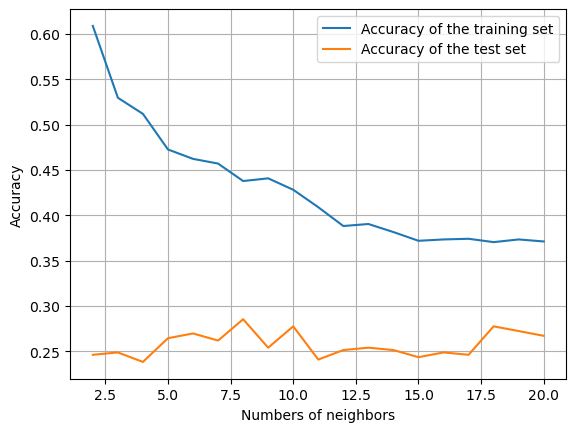

In [148]:
training_acc=[]
test_acc=[]
#Try KNN for different K-nearest neighbors from 1 to 1
neighbors_setting=range (2, 21)
for i in neighbors_setting:
    knn=KNeighborsClassifier(i)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))#?
    test_acc.append(knn.score(x_test, y_test))
    
plt.plot(neighbors_setting,training_acc, label="Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label= 
            "Accuracy of the test set")
plt.ylabel("Accuracy")
plt.xlabel("Numbers of neighbors")
plt.grid()
plt.legend()

                                                                    Conclusion

In [149]:
Conclusion_algorithms={'Algorithms': 
['DTs', 'Random Forest', '    svm kernel rbf','    svm poly method', '    svm Linear', '    svm sigmoid', 
     'Gaussian NB', 'Complement Naive Bayes', 'MultinomialNB Modeling',   'BernoulliNB Modeling','KNN Modelling' ], 
'Accuracy':
                       [ 0.9,0.88,0.96,0.95,0.966,0.95,0.86,0.543,0.5855, 0.24,0.62]
                }
Conclusion_algorithms=pd.DataFrame(Conclusion_algorithms)
Conclusion_algorithms
# Sort the DataFrame by the 'Accuracy' column in decending order(Note:ascending=False)
Conclusion_algorithms_sorted = Conclusion_algorithms.sort_values(by='Accuracy', ascending=False)
Conclusion_algorithms_sorted

Algorithms  Accuracy
4               svm Linear    0.9660
2           svm kernel rbf    0.9600
3          svm poly method    0.9500
5              svm sigmoid    0.9500
0                      DTs    0.9000
1            Random Forest    0.8800
6              Gaussian NB    0.8600
10           KNN Modelling    0.6200
8   MultinomialNB Modeling    0.5855
7   Complement Naive Bayes    0.5430
9     BernoulliNB Modeling    0.2400

So, svm Linear has the highest accuracy, and will be selected as model.

                                                                 Test Data

In [102]:
test_data=pd.read_csv(r"H:\Machine_Lerning_AM\Data\دیتاست جلسه سی ام\test.csv")
test_data

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [103]:
# Applying the changes imposed on 'Train dataset' in order to match test data with train data!
# delete rows that have 'pc'=0 

test_data2 = test_data[test_data['pc'] != 0]
test_data2.shape

(960, 21)

In [104]:
test_data2.drop(columns=["id"], inplace=True)
test_data2

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
995           1700     1          1.9         0   0       1          54   
996            609     0          1.8         1   0       0          13   
997           1185     0          1.4         0   1       1           8   
998           1533     1          0.5         1   0       0          50   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
995    0.5        170        7  17        644       913  2121    14     8   
996    0.9        186        4   2       1152      1632  1933     8     1   
997    0.5         80        1  12        477       825  1223     5     0   
998    0.4        171        2  12         38       832  2509    15    11   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[960 rows x 20 columns]

In [105]:
df.columns

Index(['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi',
       'pricerange'],
      dtype='object')

In [111]:
test_data2.rename(columns={'battery_power': 'batterypower', 'dual_sim': "dualsim",
                   "clock_speed": "clockspeed",
                   "four_g": "fourg",
                'int_memory': "intmemory", 'm_dep': "mdep", 
                   "mobile_wt":"mobilewt",
                   "n_cores":"ncores", 
                   "px_height":"pxheight",
                   "px_width":"pxwidth",
                   "sc_h":"such",
                   "sc_w":"scw",
                   "talk_time":"talktime",
                   "three_g":"three",
                   "touch_screen": "touchscreen",
                   
                
                  }, inplace=True)

In [112]:
X_train=pd.DataFrame(df4, columns=['batterypower', 'blue', 'clockspeed', 'dualsim', 'fc', 'fourg',
       'intmemory', 'mdep', 'mobilewt', 'ncores', 'pc', 'pxheight', 'pxwidth',
       'ram', 'such', 'scw', 'talktime', 'three', 'touchscreen', 'wifi'] )
y_train=df4.pricerange.values.reshape(-1, 1)
X_test=test_data

svc = svm.SVC(kernel='linear', C=100,gamma='auto').fit(X_train, y_train)
svc=clf.fit(X_train, y_train)
y_pred_Test=svc.predict(test_data2)


In [113]:
df_predict=test_data2.insert(loc=20, column="y_pred_Test", value=y_pred_Test)


In [114]:
df_predict=pd.DataFrame(test_data2)
df_predict

batterypower  blue  clockspeed  dualsim  fc  fourg  intmemory  mdep  \
0            1043     1         1.8        1  14      0          5   0.1   
1             841     1         0.5        1   4      1         61   0.8   
2            1807     1         2.8        0   1      0         27   0.9   
3            1546     0         0.5        1  18      1         25   0.5   
4            1434     0         1.4        0  11      1         49   0.5   
..            ...   ...         ...      ...  ..    ...        ...   ...   
995          1700     1         1.9        0   0      1         54   0.5   
996           609     0         1.8        1   0      0         13   0.9   
997          1185     0         1.4        0   1      1          8   0.5   
998          1533     1         0.5        1   0      0         50   0.4   
999          1270     1         0.5        0   4      1         35   0.1   

     mobilewt  ncores  ...  pxheight  pxwidth   ram  such  scw  talktime  \
0         193       3  ...       226     1412  3476    12    7         2   
1         191       5  ...       746      857  3895     6    0         7   
2         186       3  ...      1270     1366  2396    17   10        10   
3          96       8  ...       295     1752  3893    10    0         7   
4         108       6  ...       749      810  1773    15    8         7   
..        ...     ...  ...       ...      ...   ...   ...  ...       ...   
995       170       7  ...       644      913  2121    14    8        15   
996       186       4  ...      1152     1632  1933     8    1        19   
997        80       1  ...       477      825  1223     5    0        14   
998       171       2  ...        38      832  2509    15   11         6   
999       140       6  ...       457      608  2828     9    2         3   

     three  touchscreen  wifi  y_pred_Test  
0        0            1     0            3  
1        1            0     0            3  
2        0            1     1            3  
3        1            1     0            3  
4        1            0     1            1  
..     ...          ...   ...          ...  
995      1            1     0            1  
996      0            1     1            1  
997      1            0     0            0  
998      0            1     0            2  
999      1            0     1            2  

[960 rows x 21 columns]